# Prepare Data

In [1]:
#Import everything
import test_manifold_algorithms as tma
import MAGAN

2024-05-09 13:32:17.166053: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


MAGAN is running on TensorFlow 2.16.1


In [2]:
"""Clear Directory"""
#Careful. This will reset all of the resutls that we have collected
#tma.clear_directory()

#Converts old way of storing files to the new - if any
#tma.change_old_files_to_new()

True

In [8]:
"""Practice Tests to Run"""
test = tma.test_manifold_algorithms("iris.csv", split = "random", percent_of_anchors = [0.05, 0.1, 0.15, 0.2, 0.3], random_state=6739, verbose = 2)
#print(f"Anchors : {test.anchors}")
#print(f"KNN range {test.knn_range}")
#test.run_SPUD_tests(kind = ["distance"])
#test.run_DIG_tests(predict = True)
#test.run_NAMA_tests()
test.run_DTA_tests()
#test.run_SSMA_tests()
#MAGAN.run_MAGAN(test.split_A, test.split_B, labels1 = test.labels)



 
 
---------------------------       Initalizing class with iris.csv data       ---------------------------

Splitting the data randomly
Split A features shape: (150, 3)
Split B Features shape (150, 1)
MDS initialized with 2 components
The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)
<><><><><>    File /Users/user/Desktop/Work/ManifoldData/iris/DTA(r6739)_AP(0.05-0.1-0.15-0.2-0.3)_38.npy already exists   <><><><><>


True

In [113]:
"""Testing All functions"""
class_instances = tma.run_all_tests(csv_files = ["iris.csv"], test_random = 1, #General function arguments
                                split = "random", verbose = 0, percent_of_anchors = [0.05, 0.1, 0.15, 0.2, 0.3], #Init Key arguments
                                run_DIG = False, page_ranks = ("None", "off-diagonal", "full"), predict = True, #DIG key arguments
                                run_DTA = False,
                                run_NAMA = False,
                                run_SSMA = False,
                                run_SPUD = True, operations = ("average", "abs"), kind = ["distance", "pure", "similarity"]) #SPUD key arguments | SPUDS_Algorithm


-------------------------------------    SPUD Tests iris   -------------------------------------

Operation average
    Kind distance
        <><><><><>    File /Users/user/Desktop/Work/ManifoldData/iris/SPUD(r1825)_Ope(average)_Kin(distance)_AP(0.05-0.1-0.15-0.2-0.3)_38.npy already exists   <><><><><>
    Kind pure
        KNN 2
            Percent of Anchors 0.05
                FOSCTTM Score: 0.47653333333333325
                CE Score: 0.38666666666666666
            Percent of Anchors 0.1
                FOSCTTM Score: 0.3628888888888889
                CE Score: 0.7133333333333334
            Percent of Anchors 0.15
                FOSCTTM Score: 0.3322666666666667
                CE Score: 0.6666666666666666
            Percent of Anchors 0.2
                FOSCTTM Score: 0.30333333333333334
                CE Score: 0.6666666666666666
            Percent of Anchors 0.3
                FOSCTTM Score: 0.24191111111111108
                CE Score: 0.8666666666666667
        KNN

In [62]:
"""Visualization"""
#Veiwing with MatplotLib
tma.visualize_results(file_names = 'all')

ValueError: Cannot load file containing pickled data when allow_pickle=False

In [3]:
#Veiwing with DataFrame
df = tma.upload_to_DataFrame()

#Add a combined metric to help see (The closer to 1 the better)
df["Combined_Metric"] = df["Cross_Embedding_KNN"] - df["FOSCTTM"]

df.columns

-------------------------------------------------------------------------------------------------------
Unable to load heart_failure/.DS_Store. 
Error Caught: Cannot load file containing pickled data when allow_pickle=False 
Continuing Loop without uploading file
-------------------------------------------------------------------------------------------------------


Index(['csv_file', 'method', 'seed', 'split', 'KNN', 'Percent_of_Anchors',
       'FOSCTTM', 'Cross_Embedding_KNN', 'Page_Rank', 'Predicted_Feature_MAE',
       'Operation', 'SPUDS_Algorithm', 'Combined_Metric'],
      dtype='object')

In [112]:
#df.groupby(['csv_file', 'method'])[['FOSCTTM', "Cross_Embedding_KNN"]].mean()

# Visualization Tests

1. We want a box & whiskers plot of each method (Make it flexible so we can swicth between which csv files we are using). Show both FOSCTTM and CE
2. We also want a box and whiskers plot of different arguments within each method 
3. Create a line plot of Methods against csv files -> (For each value, we can find the best method arguments for that csv file, and compare best to best)


In [4]:
import matplotlib.pyplot as plt

## Comparing Methods with Box Plots

In [71]:
#If we want to see only a few csv files at a time, we can sub set it here
df_subset = df[df["csv_file"] == "glass"]

#To see all of it combined
#df_subet = df

(FOSCTTM    Axes(0.125,0.11;0.775x0.77)
 dtype: object,
 Cross_Embedding_KNN    Axes(0.125,0.11;0.775x0.77)
 dtype: object,
 Combined_Metric    Axes(0.125,0.11;0.775x0.77)
 dtype: object)

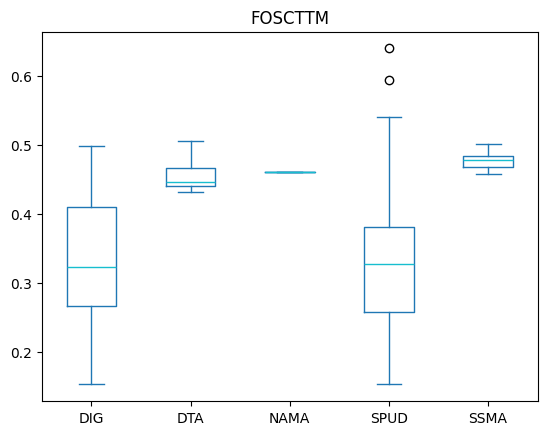

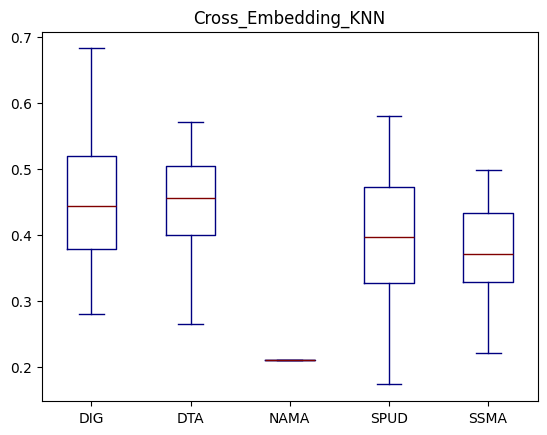

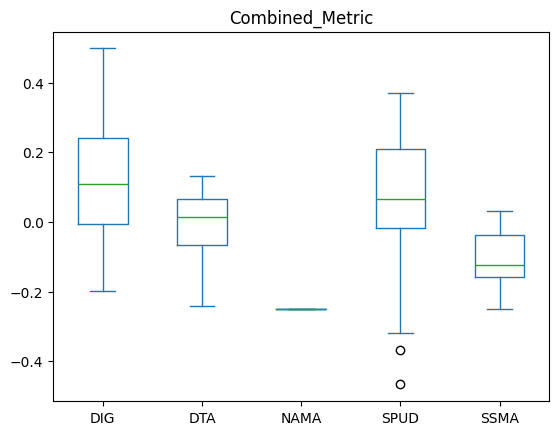

In [86]:
(df_subset.plot(column='FOSCTTM', by='method', kind = 'box', cmap='tab10' ),
df_subset.plot(column='Cross_Embedding_KNN', by='method', kind = 'box', cmap = "jet"),
df_subset.plot(column='Combined_Metric', by='method', kind = 'box')

## Comparing Arguments within the same Methods

### DIG

We See that Page Rank has little effect on the overall graph data

In [101]:
#If we want to see only a few csv files at a time, we can sub set it here
df_subset2 = df[df["csv_file"] == "glass"]

#To see all of it combined
#df_subet2 = df

#Change the method to DIG
df_subset2 = df[df["method"] == "DIG"]

(FOSCTTM    Axes(0.125,0.11;0.775x0.77)
 dtype: object,
 Cross_Embedding_KNN    Axes(0.125,0.11;0.775x0.77)
 dtype: object,
 Combined_Metric    Axes(0.125,0.11;0.775x0.77)
 dtype: object,
 Predicted_Feature_MAE    Axes(0.125,0.11;0.775x0.77)
 dtype: object)

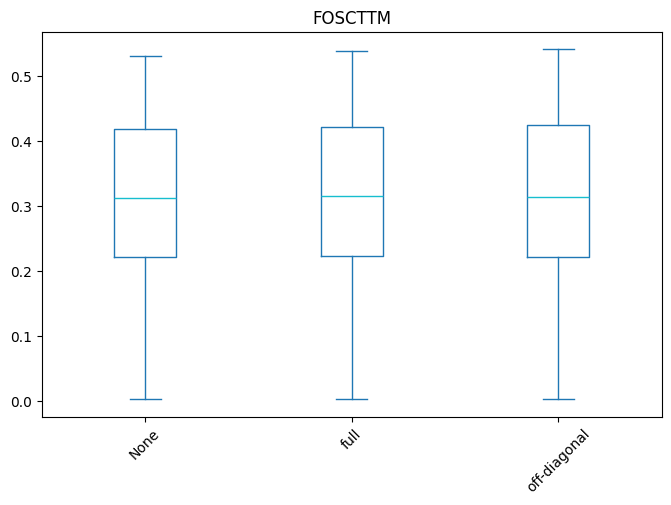

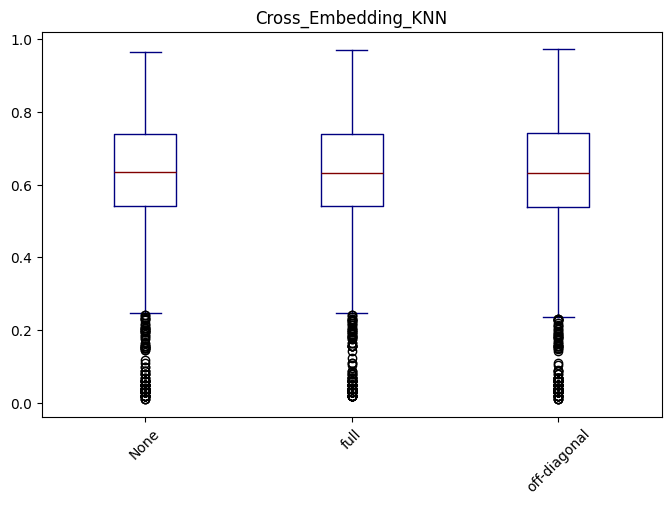

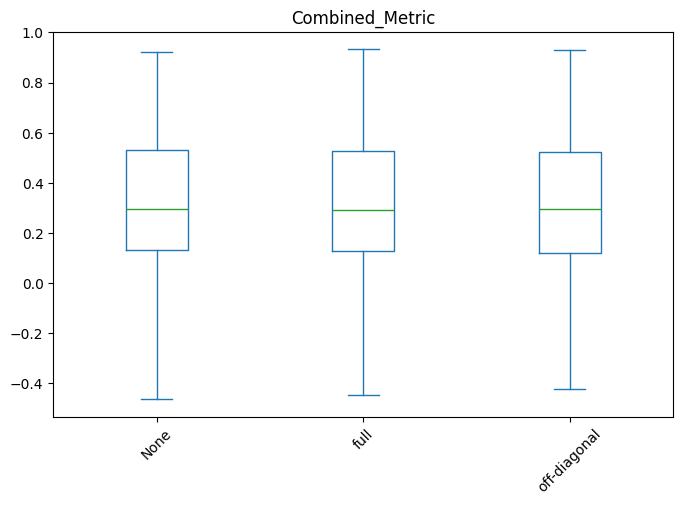

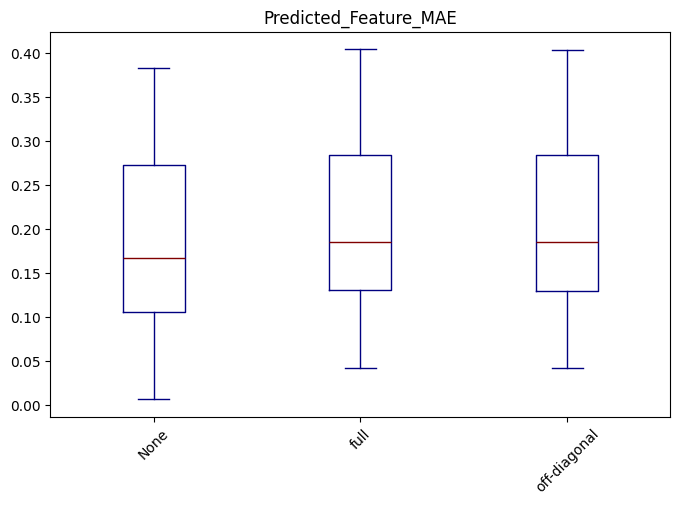

In [130]:
#To make it easier to add edits
key_words = {"figsize": (8, 5),
            "kind": "box",
            "by": "Page_Rank",
            "rot": 45}

(df_subset2.plot(column='FOSCTTM', cmap='tab10', **key_words),
df_subset2.plot(column='Cross_Embedding_KNN', cmap = "jet", **key_words),
df_subset2.plot(column='Combined_Metric', **key_words),
df_subset2.plot(column='Predicted_Feature_MAE', cmap = "jet", **key_words))

### SPUD

Notes:
1. Distance seems to be the best metric (This note was made when we only have iris data tested)

In [5]:
#If we want to see only a few csv files at a time, we can sub set it here
#df_subset3 = df[df["csv_file"] == "iris"]

#To see all of it combined
df_subet3 = df

#Change the method to DIG
df_subset3 = df[df["method"] == "SPUD"]

#Combine DIG argumenst
df_subset3["Combined_Arguments"] = df_subset3["Operation"]+ " and " + df_subset3["SPUDS_Algorithm"]

/var/folders/g7/6x5k_xzn7rg11nhcgfgp3g740000gn/T/ipykernel_1142/426300760.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset3["Combined_Arguments"] = df_subset3["Operation"]+ " and " + df_subset3["SPUDS_Algorithm"]


(FOSCTTM    Axes(0.125,0.11;0.775x0.77)
 dtype: object,
 Cross_Embedding_KNN    Axes(0.125,0.11;0.775x0.77)
 dtype: object,
 Combined_Metric    Axes(0.125,0.11;0.775x0.77)
 dtype: object)

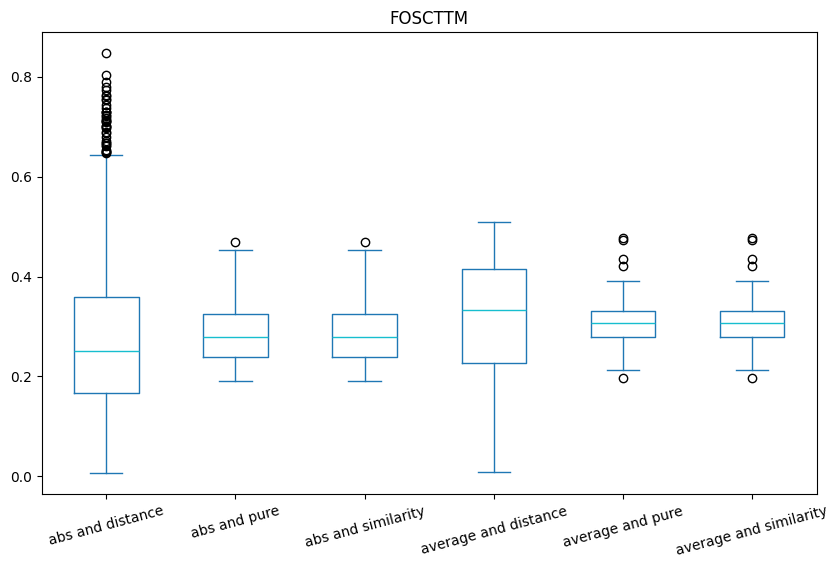

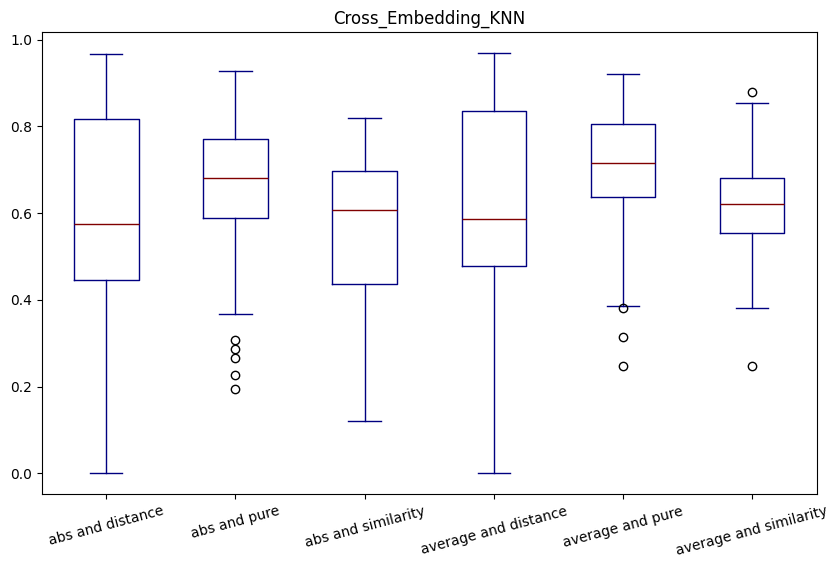

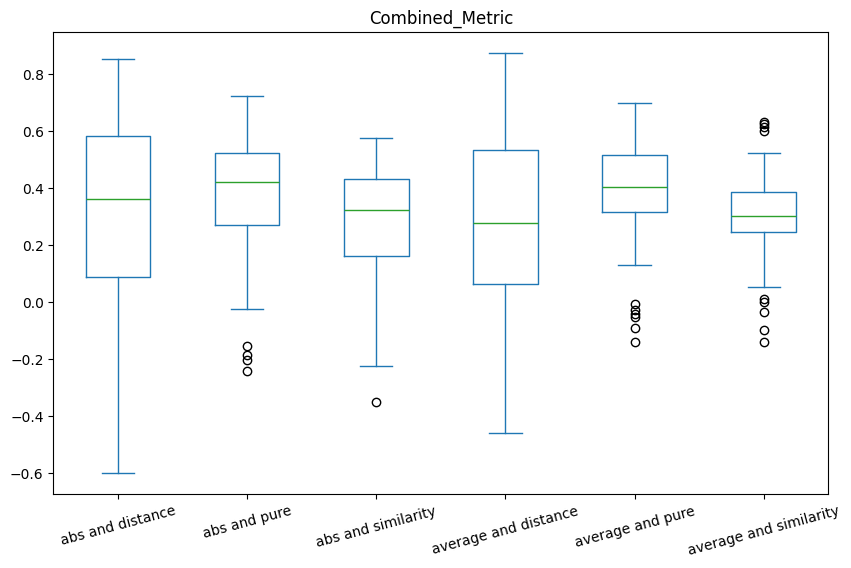

In [132]:
#To make it easier to add edits
key_words = {"figsize": (10, 6),
            "kind": "box",
            "by": "Combined_Arguments",
            "rot": 15}

(df_subset3.plot(column='FOSCTTM', cmap='tab10', **key_words),
df_subset3.plot(column='Cross_Embedding_KNN', cmap = "jet", **key_words),
df_subset3.plot(column='Combined_Metric', **key_words))

## Comparing Methods against CSV Files

In [50]:
#Sort out by methods
import pandas as pd

agregate_df = pd.DataFrame({
    'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")["Combined_Metric"].max(),
    'DTA': df[df["method"] == "DTA"].groupby("csv_file")["Combined_Metric"].max(),
    'SPUD': df[df["method"] == "SPUD"].groupby("csv_file")["Combined_Metric"].max(),
    'DIG': df[df["method"] == "DIG"].groupby("csv_file")["Combined_Metric"].max(),
    'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")["Combined_Metric"].max()
})

agregate_df = agregate_df.reset_index()

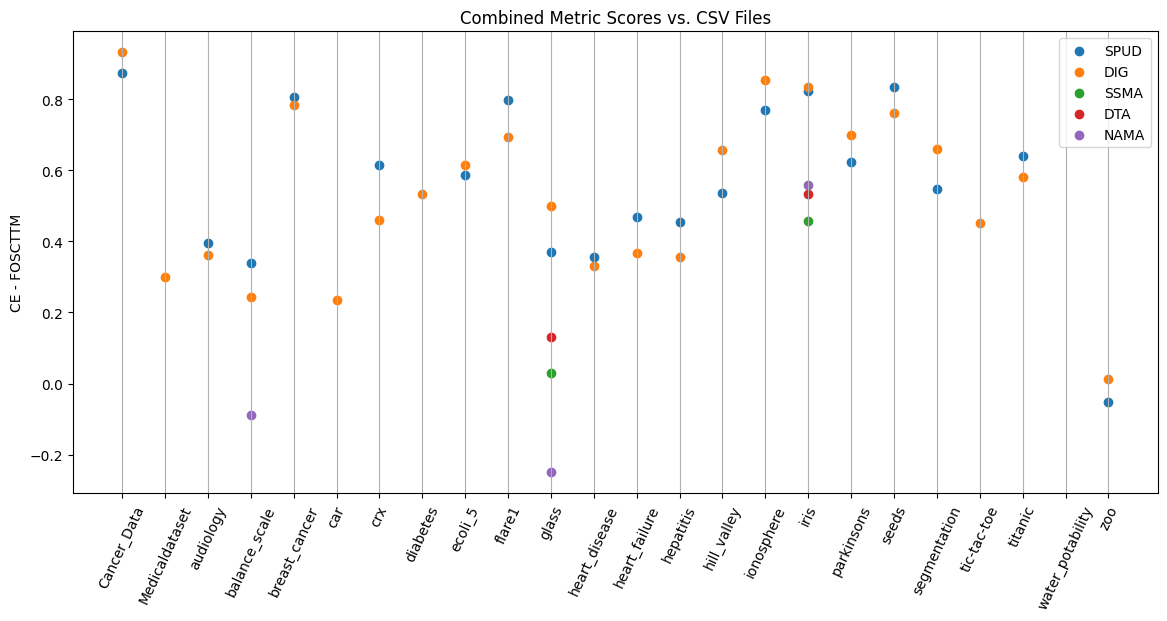

In [61]:
#To make it easier to add edits
key_words = {"x" : agregate_df.index
            }

plt.figure(figsize=(14, 6))
ax = plt.scatter(y = agregate_df["SPUD"], label = "SPUD", **key_words)
ax = plt.scatter(y = agregate_df["DIG"], label = "DIG", **key_words)
ax = plt.scatter(y = agregate_df["SSMA"], label = "SSMA", **key_words)
ax = plt.scatter(y = agregate_df["DTA"], label = "DTA", **key_words)
ax = plt.scatter(y = agregate_df["NAMA"], label = "NAMA", **key_words)

#Show Legend
plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 65)
plt.title("Combined Metric Scores vs. CSV Files")
plt.ylabel("CE - FOSCTTM")
plt.grid(visible=True, axis = "x")
plt.legend()

# Debugging Tests Below

In [2]:
iris_tma = tma.test_manifold_algorithms("glass.csv", split = "even", percent_of_anchors= [0.1], verbose = 2)


 
 
---------------------------       Initalizing class with glass.csv data       ---------------------------

Spliting the data evenly
Split A features shape: (214, 5)
Split B Features shape (214, 4)
MDS initialized with 4 components
The knn values are: (2, 7, 12, 17, 22, 27, 32, 37, 42, 47)


In [3]:
import tensorflow as tf

In [4]:
import numpy as np
def get_data(n_batches=2, n_pts_per_cluster=500):
    """Return the artificial data."""
    make = lambda x,y,s: np.concatenate([np.random.normal(x,s, (n_pts_per_cluster, 1)), np.random.normal(y,s, (n_pts_per_cluster, 1))], axis=1)
    # batch 1
    xb1 = np.concatenate([make(-1.3, 2.2, .1), make(.1, 1.8, .1), make(.8, 2, .1)], axis=0)
    labels1 = np.concatenate([0 * np.ones(n_pts_per_cluster), 1 * np.ones(n_pts_per_cluster), 2 * np.ones(n_pts_per_cluster)], axis=0)

    # batch 2
    xb2 = np.concatenate([make(-.9, -2, .1), make(0, -2.3, .1), make(1.5, -1.5, .1)], axis=0)
    labels2 = np.concatenate([0 * np.ones(n_pts_per_cluster), 1 * np.ones(n_pts_per_cluster), 2 * np.ones(n_pts_per_cluster)], axis=0)

    return xb1, xb2, labels1, labels2

In [5]:
xb1, xb2, labels1, labels2 = get_data()

In [8]:
help(tf.compat.v1)

Instructions for updating:
Use `tf.GraphKeys.GLOBAL_VARIABLES` instead.
Help on package tensorflow.compat.v1 in tensorflow.compat:

NAME
    tensorflow.compat.v1 - Bring in all of the public TensorFlow interface into this module.

PACKAGE CONTENTS
    __internal__ (package)
    app (package)
    audio (package)
    autograph (package)
    bitwise (package)
    compat (package)
    config (package)
    data (package)
    debugging (package)
    distribute (package)
    distributions (package)
    dtypes (package)
    errors (package)
    experimental (package)
    feature_column (package)
    gfile (package)
    graph_util (package)
    image (package)
    initializers (package)
    io (package)
    layers (package)
    linalg (package)
    lite (package)
    logging (package)
    lookup (package)
    losses (package)
    manip (package)
    math (package)
    metrics (package)
    mixed_precision (package)
    mlir (package)
    nest (package)
    nn (package)
    profiler (package)
  

Batch 1 shape: (1500, 2) Batch 2 shape: (1500, 2)


2024-05-09 13:32:50.303159: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled


Losses: D G 0.000 6.255


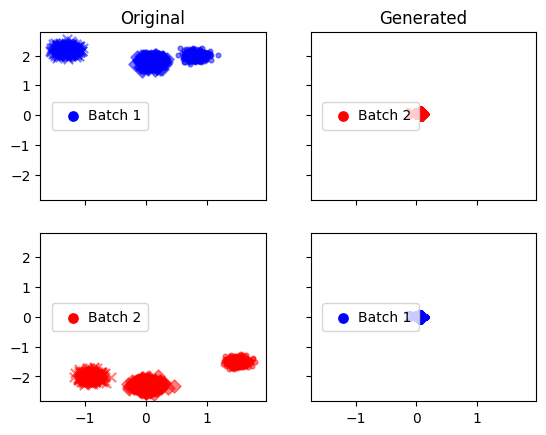

Losses: D G 0.000 6.953


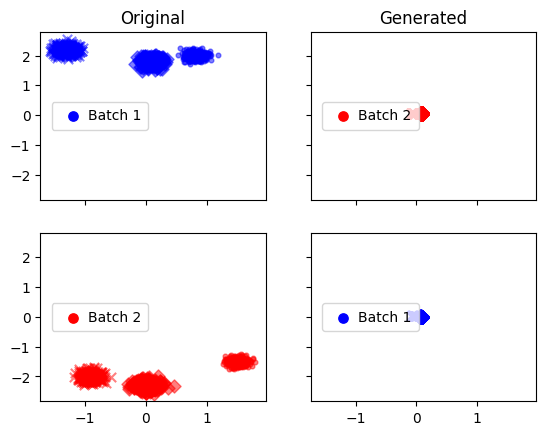

Losses: D G 0.000 7.388


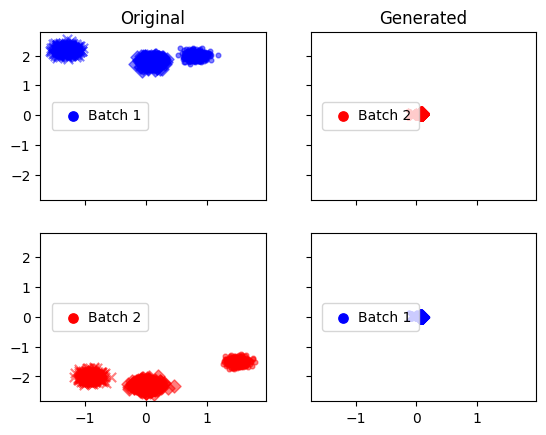

KeyboardInterrupt: 

In [6]:
MAGAN.run_MAGAN(xb1, xb2, labels1, labels2)

Batch 1 shape: (214, 5) Batch 2 shape: (214, 4)


2024-05-09 13:28:43.011838: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled


Losses: D G 0.000 6.155


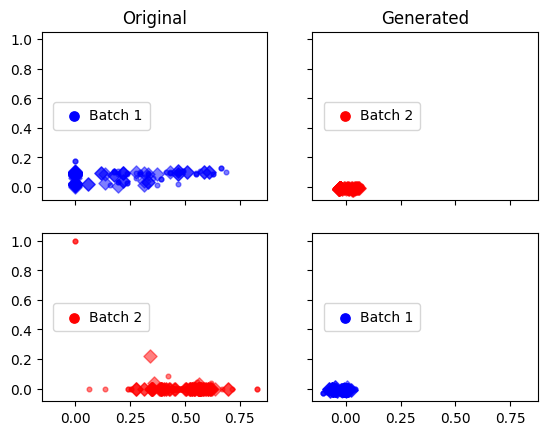

Losses: D G 0.000 6.835


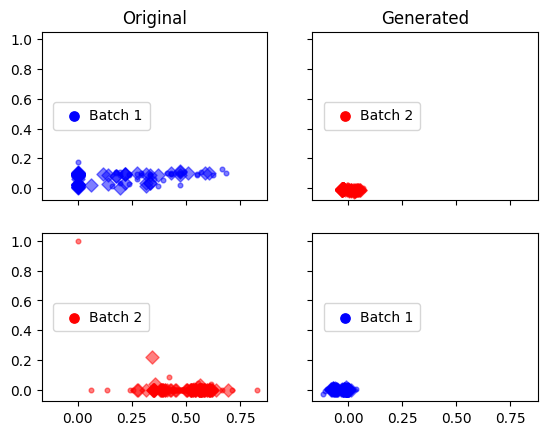

Losses: D G 0.000 7.259


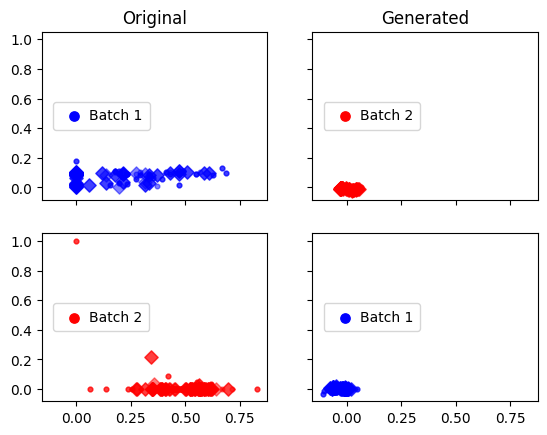

Losses: D G 0.000 7.657


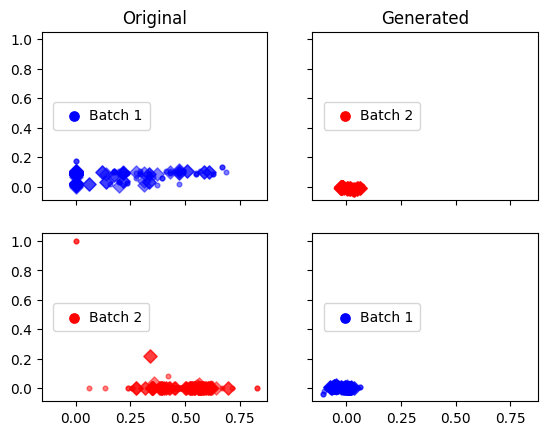

Losses: D G 0.000 8.078


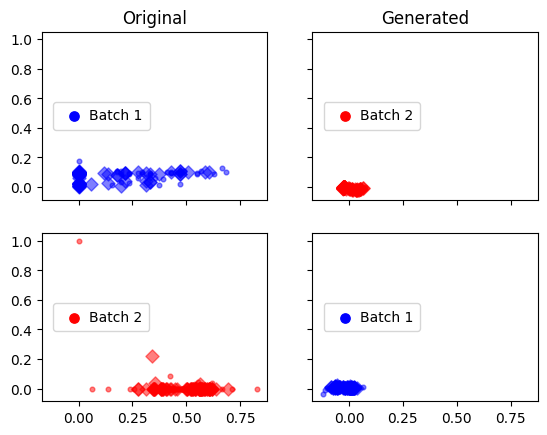

KeyboardInterrupt: 

In [65]:
MAGAN.run_MAGAN(iris_tma.split_A, iris_tma.split_B, labels1 = iris_tma.labels)

'/Users/user/Desktop/Work/Python_Files'